# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject
# Make csv files to datafranes and merge datasets
df_tres = pd.read_csv('Treasuries.csv', sep=";")
#print(df_tres.head(10))
df_agency = pd.read_csv('Agency.csv', sep=";")
print(df_tres.columns)
print(df_agency.columns)
df_merged = df_tres.merge(df_agency, on="Date", how='inner')
df_merged.sort_values(by=['Number'], ascending=False)
df_merged["Date"] = pd.to_datetime(df_merged["Date"], format="%d.%m.%Y")
print (df_merged.head(10))

#plt.plot(df_merged["Date"], df_merged["Freddie Mac 30"])



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Index(['Date', '1 year', '3 year', '5 year', '10 year', '30 year', 'Number',
       'Citi surprise'],
      dtype='object')
Index(['Date', 'Freddie Mac 10', 'Fannie Mae 10', 'Fannie Mae 30',
       'Freddie Mac 30', 'Freddie Mac 5', 'Fannie Mae 5', 'Freddie Mac 3',
       'Fannie Mae 3'],
      dtype='object')
        Date  1 year  3 year  5 year  10 year  30 year  Number  Citi surprise  \
0 2011-12-30      12      36      83      189      289    1001           6850   
1 2011-12-29      12      41      88      191      290    1000           6940   
2 2011-12-28      12      42      91      193      291     999           6950   
3 2011-12-27      12      45      96      202      304     998           7120   
4 2011-12-23      12      45      97      203      305     997           7120   
5 2011-12-22      12      41      91      197      299     996           6940   
6 2011-12-21      13      40     

# Read and clean data

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

SelectMultiple(description='Select variables:', index=(0,), options=('1 year', '3 year', '5 year', '10 year', …

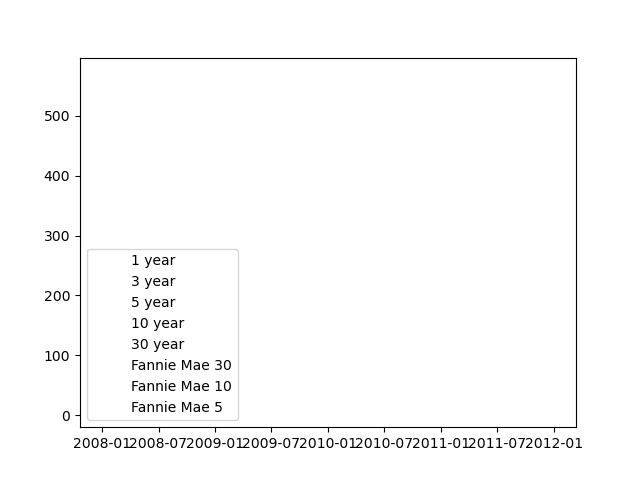

In [21]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

# Load data
variable_names = ['1 year', '3 year', '5 year', '10 year', '30 year', 'Fannie Mae 30', 'Fannie Mae 10', 'Fannie Mae 5']

# Define initial plot
fig, ax = plt.subplots()
lines = []
for variable_name in variable_names:
    line, = ax.plot(df_merged['Date'], df_merged[variable_name], label=variable_name, visible=False)
    lines.append(line)
ax.legend()
    
# Define callback function to update plot
def update_plot(change):
    selected_variables = change.new
    for i, line in enumerate(lines):
        if variable_names[i] in selected_variables:
            line.set_visible(True)
        else:
            line.set_visible(False)
    ax.legend()
    fig.canvas.draw_idle()

# Define widget
select_multiple = widgets.SelectMultiple(options=variable_names, value=[variable_names[0]], description='Select variables:')
select_multiple.observe(update_plot, names='value')

# Display plot and widget
display(select_multiple)

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.